## CUSTOMER CHURN ANALYSIS - PREDICTIVE MODELING

### Section 1: Data Preparation

##### 1.1 Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score

##### 1.2 Load Data

In [2]:
# Load data
df = pd.read_csv('Data/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### 1.3 Explore Data

In [3]:
# Check basic info
print("Dataset shape:", df.shape)
print(df.info())

Dataset shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [4]:
# Check missing values
print(f'Missing values : \n{df.isnull().sum()}')

Missing values : 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


##### 1.4 Data Cleaning - TotalCharges

In [5]:
# Check TotalCharges 
print(df['TotalCharges'].head(20))
print("\nUnique non-numeric values in TotalCharges:")
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]['TotalCharges'].unique())

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19     1862.9
Name: TotalCharges, dtype: object

Unique non-numeric values in TotalCharges:
[' ']


In [6]:
# Convert TotalCharges to numeric 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Missing values after conversion:\n{df['TotalCharges'].isnull().sum()}")
print("\nData type of TotalCharges:", df['TotalCharges'].dtype)

Missing values after conversion:
11

Data type of TotalCharges: float64


In [7]:
# Show all columns for NaN rows
nan_rows = df[df['TotalCharges'].isnull()]
print("Full details of NaN TotalCharges rows:")
print(nan_rows[['customerID', 'tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn']])

Full details of NaN TotalCharges rows:
      customerID  tenure  Contract  MonthlyCharges  TotalCharges Churn
488   4472-LVYGI       0  Two year           52.55           NaN    No
753   3115-CZMZD       0  Two year           20.25           NaN    No
936   5709-LVOEQ       0  Two year           80.85           NaN    No
1082  4367-NUYAO       0  Two year           25.75           NaN    No
1340  1371-DWPAZ       0  Two year           56.05           NaN    No
3331  7644-OMVMY       0  Two year           19.85           NaN    No
3826  3213-VVOLG       0  Two year           25.35           NaN    No
4380  2520-SGTTA       0  Two year           20.00           NaN    No
5218  2923-ARZLG       0  One year           19.70           NaN    No
6670  4075-WKNIU       0  Two year           73.35           NaN    No
6754  2775-SEFEE       0  Two year           61.90           NaN    No


In [8]:
# Remove rows with NaN TotalCharges
df = df.dropna(subset=['TotalCharges'])
print("Shape after dropping:", df.shape)
print("Missing values:",df.isnull().sum().sum())

Shape after dropping: (7032, 21)
Missing values: 0


##### 1.5 Convert Target Variable

In [9]:
# Convert Churn to numeric (Yes=1, No=0)
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

print("\nChurn distribution:")
print(df['Churn'].value_counts())
print("\nChurn percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Check data type
print("\nChurn data type:", df['Churn'].dtype)


Churn distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64

Churn percentage:
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

Churn data type: int32


### Section 2: Feature Engineering

##### 2.1 Select Relevant Features

In [10]:
# Select features identified from EDA
features_to_use = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService', 'TechSupport', 'OnlineSecurity']

X = df[features_to_use].copy()
y = df['Churn'].copy()

print("Features selected:")
print(X.columns.tolist())
print("\nFeature data types:")
print(X.dtypes)
print("\nFeature shape:", X.shape)
print("\nTarget shape:", y.shape)
print("\nFirst few rows of X:")
X.head()

Features selected:
['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService', 'TechSupport', 'OnlineSecurity']

Feature data types:
tenure               int64
MonthlyCharges     float64
TotalCharges       float64
Contract            object
InternetService     object
TechSupport         object
OnlineSecurity      object
dtype: object

Feature shape: (7032, 7)

Target shape: (7032,)

First few rows of X:


,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,TechSupport,OnlineSecurity
0,1,29.85,29.85,Month-to-month,DSL,No,No
1,34,56.95,1889.50,One year,DSL,No,Yes
2,2,53.85,108.15,Month-to-month,DSL,No,Yes
3,45,42.30,1840.75,One year,DSL,Yes,Yes
4,2,70.70,151.65,Month-to-month,Fiber optic,No,No


##### 2.2 Encode Categorical Variables

In [11]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['Contract', 'InternetService', 'TechSupport', 'OnlineSecurity'], drop_first=True)

print("Shape after encoding:", X_encoded.shape)
print("\nColumns after encoding:")
print(X_encoded.columns.tolist())
print("\nData types after encoding:")
print(X_encoded.dtypes)
print("\nFirst few rows:")
X_encoded.head()

Shape after encoding: (7032, 11)

Columns after encoding:
['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic', 'InternetService_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes']

Data types after encoding:
tenure                                  int64
MonthlyCharges                        float64
TotalCharges                          float64
Contract_One year                        bool
Contract_Two year                        bool
InternetService_Fiber optic              bool
InternetService_No                       bool
TechSupport_No internet service          bool
TechSupport_Yes                          bool
OnlineSecurity_No internet service       bool
OnlineSecurity_Yes                       bool
dtype: object

First few rows:


,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,1,29.85,29.85,False,False,False,False,False,False,False,False
1,34,56.95,1889.50,True,False,False,False,False,False,False,True
2,2,53.85,108.15,False,False,False,False,False,False,False,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,True
4,2,70.70,151.65,False,False,True,False,False,False,False,False


##### 2.3 Convert Bool to Int

In [12]:
# Convert bool to int (True=1, False=0)
X_encoded = X_encoded.astype(int)

print("Data types after conversion:")
print(X_encoded.dtypes)
print("\nFirst few rows:")
X_encoded.head()

Data types after conversion:
tenure                                int32
MonthlyCharges                        int32
TotalCharges                          int32
Contract_One year                     int32
Contract_Two year                     int32
InternetService_Fiber optic           int32
InternetService_No                    int32
TechSupport_No internet service       int32
TechSupport_Yes                       int32
OnlineSecurity_No internet service    int32
OnlineSecurity_Yes                    int32
dtype: object

First few rows:


,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,1,29,29,0,0,0,0,0,0,0,0
1,34,56,1889,1,0,0,0,0,0,0,1
2,2,53,108,0,0,0,0,0,0,0,1
3,45,42,1840,1,0,0,0,0,1,0,1
4,2,70,151,0,0,1,0,0,0,0,0


### Section 3: Train-Test Split

##### 3.1 Split Data (80-20)

In [13]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

print("\nTraining set - Churn distribution:",y_train.value_counts())
print("\nTest set - Churn distribution:", y_test.value_counts())

print("\nTraining set - Churn percentage:", y_train.value_counts(normalize=True) * 100)
print("\nTest set - Churn percentage:", y_test.value_counts(normalize=True) * 100)

Training set shape: (5625, 11)
Test set shape: (1407, 11)

Training set - Churn distribution: Churn
0    4130
1    1495
Name: count, dtype: int64

Test set - Churn distribution: Churn
0    1033
1     374
Name: count, dtype: int64

Training set - Churn percentage: Churn
0    73.422222
1    26.577778
Name: proportion, dtype: float64

Test set - Churn percentage: Churn
0    73.418621
1    26.581379
Name: proportion, dtype: float64


### Section 4: Model Building

##### 4.1 Train Logistic Regression with class_weight='balanced'

In [14]:
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


##### 4.2 Feature Importance / Coefficients

In [15]:
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_[0]
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)
print(feature_importance)

                               Feature  Coefficient
5          InternetService_Fiber optic     0.577345
1                       MonthlyCharges     0.006869
2                         TotalCharges     0.000318
0                               tenure    -0.054278
6                   InternetService_No    -0.355352
7      TechSupport_No internet service    -0.355352
9   OnlineSecurity_No internet service    -0.355352
8                      TechSupport_Yes    -0.512177
10                  OnlineSecurity_Yes    -0.566832
3                    Contract_One year    -0.896539
4                    Contract_Two year    -1.554339


### Section 5: Model Evaluation

##### 5.1 Make Predictions on Test Set

In [16]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

##### 5.2 Confusion Matrix

In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[725 308]
 [ 77 297]]


##### 5.3 Classification Report

In [18]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



##### 5.4 Key Metrics

In [19]:
print("\nKey Metrics:")
print(f"Accuracy: {model.score(X_test, y_test):.4f}")
print(f"Recall (catching churners): {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


Key Metrics:
Accuracy: 0.7264
Recall (catching churners): 0.7941
Precision: 0.4909
F1 Score: 0.6067
ROC-AUC Score: 0.8248


### Section 6: Visualizations

##### 6.1 Feature Importance Plot

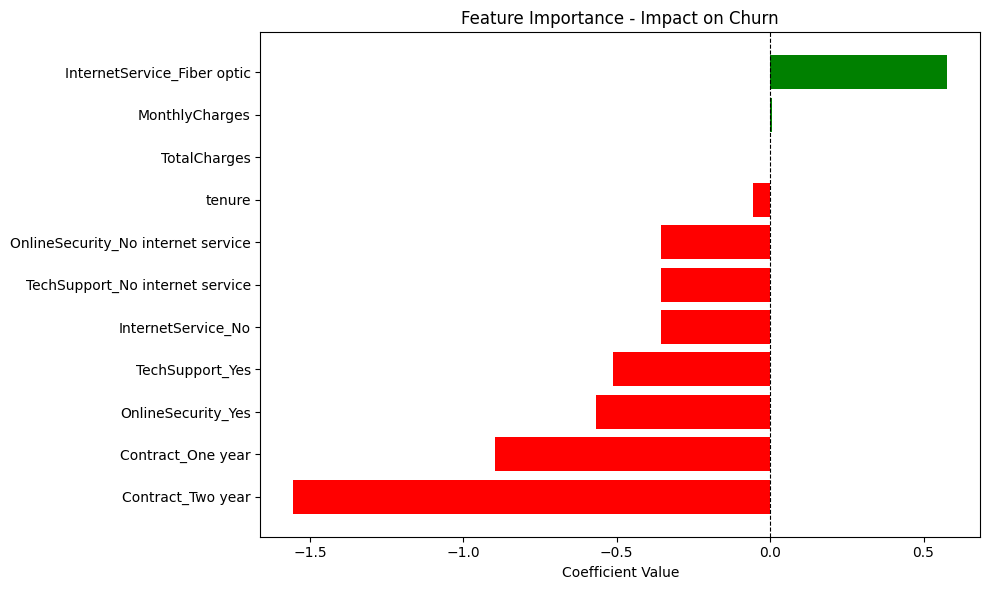

In [20]:
# Feature importance plot
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient')

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], 
         color=['red' if x < 0 else 'green' for x in feature_importance['Coefficient']])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance - Impact on Churn')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

The horizontal bar chart displays model coefficients for each feature, indicating their impact on churn probability. 
- Green bar (positive coefficient) shows InternetService_Fiber optic (+0.577) increases churn risk. 
- Red bars (negative coefficients) indicate protective factors against churn. 
- Contract_Two year (-1.554) is the strongest protective factor, followed by Contract_One year (-0.897). 
- OnlineSecurity_Yes (-0.567) and TechSupport_Yes (-0.512) show moderate protective effects. 
- Tenure (-0.054) shows a weak but cumulative protective effect. 
- MonthlyCharges and TotalCharges show minimal impact. 
- This ranking aligns with EDA findings, validating that contract type, support services, and internet service quality are the primary churn drivers.

##### 6.2 Confusion Matrix Heatmap

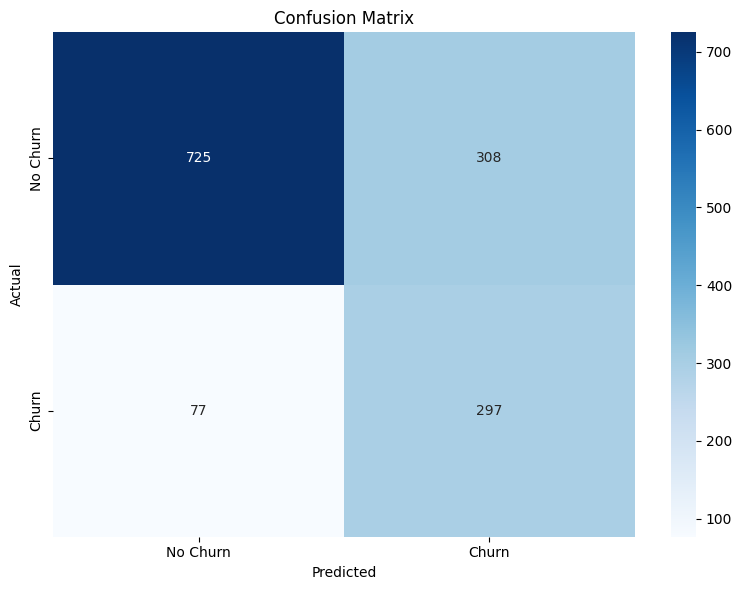

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

The confusion matrix displays model predictions versus actual outcomes on the test set (1,407 customers):
- **True Negatives (725):** Customers predicted as "No Churn" who actually did not churn (correct prediction)
- **False Positives (308):** Customers predicted as "Churn" who actually did not churn (false alarm)
- **False Negatives (77):** Customers predicted as "No Churn" who actually churned (missed churners)
- **True Positives (297):** Customers predicted as "Churn" who actually churned (correct prediction)

The model correctly identified 297 of 374 actual churners (79.4% recall), missing only 77 churners. While 308 false positives indicate some over-prediction of churn, this trade-off is acceptable for a retention program where reaching additional customers is preferable to missing actual churners.

##### 6.3 ROC Curve 

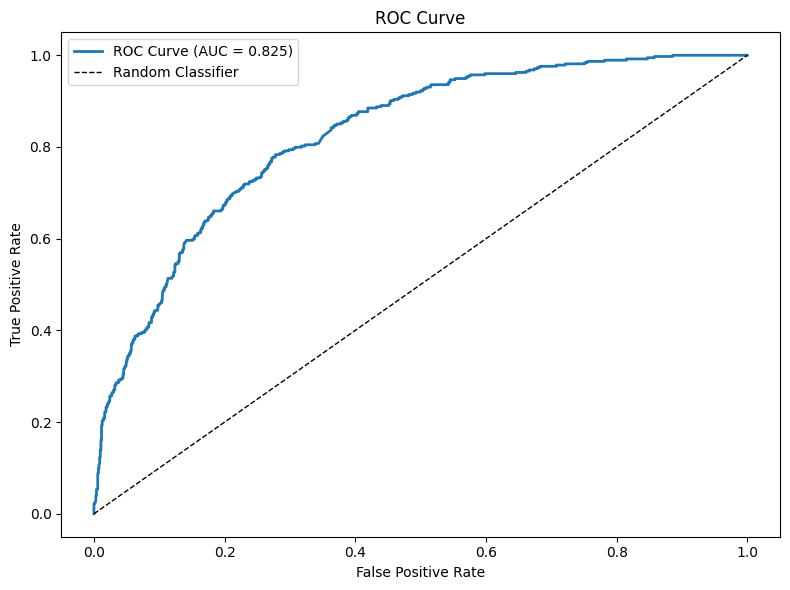

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

The ROC (Receiver Operating Characteristic) curve displays the model's ability to distinguish between churners and non-churners across different classification thresholds. 
- The blue curve represents the model's performance, while the dashed diagonal line represents random guessing (50% accuracy). 
- The model's curve is positioned well above the diagonal line, indicating strong discriminative ability. 
- The AUC (Area Under the Curve) of 0.825 means the model has an 82.5% probability of correctly ranking a random churner higher than a random non-churner. This indicates excellent discrimination performance, substantially better than random classification.

##### 6.4 Model Performance Metrics Summary

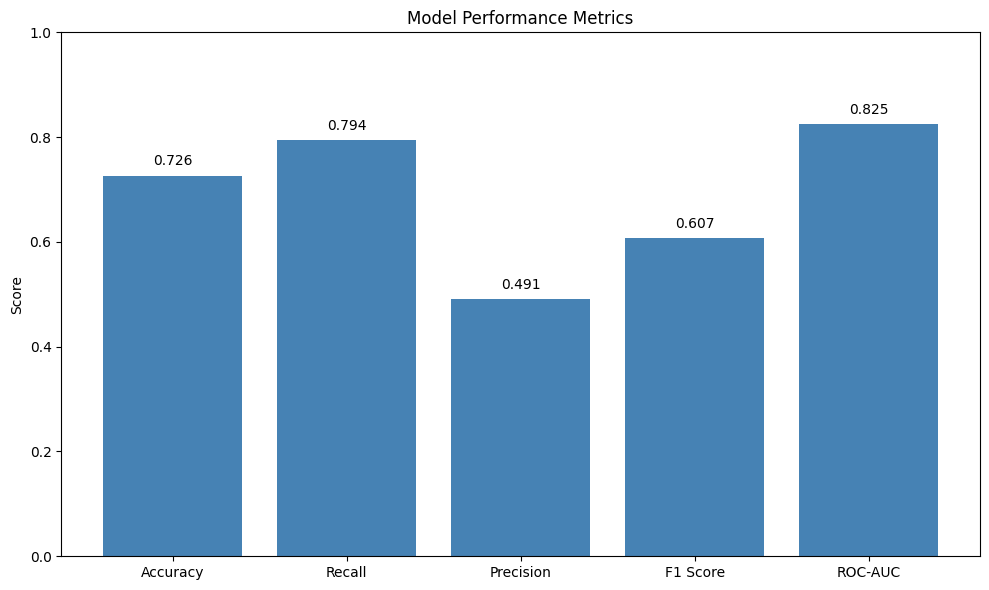

In [23]:
metrics = {
    'Accuracy': model.score(X_test, y_test),
    'Recall': recall_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
}

plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color='steelblue')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.ylim([0, 1])
for i, (k, v) in enumerate(metrics.items()):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center')
plt.tight_layout()
plt.show()

The bar chart summarizes five key evaluation metrics for the predictive model:

- **Accuracy (0.726):** 72.6% of all predictions are correct. However, accuracy alone is insufficient due to class imbalance.

- **Recall (0.794):** The model identifies 79.4% of actual churners. This high recall is the primary objective, ensuring most at-risk customers are flagged for intervention.

- **Precision (0.491):** Of customers predicted to churn, 49.1% actually churned. This moderate precision indicates acceptable false alarm rate for a retention program.

- **F1 Score (0.607):** Harmonic mean of precision and recall, balancing both metrics at 0.607.

- **ROC-AUC (0.825):** Excellent discrimination ability with 82.5% probability of correctly ranking a churner higher than a non-churner.

The model prioritizes recall over precision, accepting false positives to ensure minimal missed churners for proactive retention efforts.